# **Data Loading and inspection**

In [39]:
import pandas as pd
df = pd.read_csv('Airline_Delay_Cause.csv')
df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2023,12,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",72.0,5.0,2.46,1.00,...,0.0,0.81,0.0,0.0,672.0,61.0,574.0,20.0,0.0,17.0
1,2023,12,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",62.0,7.0,4.25,0.00,...,0.0,1.75,0.0,0.0,348.0,252.0,0.0,33.0,0.0,63.0
2,2023,12,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",95.0,10.0,5.94,0.00,...,0.0,3.00,0.0,0.0,859.0,536.0,0.0,47.0,0.0,276.0
3,2023,12,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",23.0,2.0,0.56,0.00,...,0.0,1.44,1.0,0.0,75.0,9.0,0.0,0.0,0.0,66.0
4,2023,12,9E,Endeavor Air Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",2111.0,256.0,76.88,8.75,...,0.0,117.94,1.0,0.0,21424.0,8906.0,732.0,1487.0,0.0,10299.0


In [2]:
df.shape

(179338, 21)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179338 entries, 0 to 179337
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 179338 non-null  int64  
 1   month                179338 non-null  int64  
 2   carrier              179338 non-null  object 
 3   carrier_name         179338 non-null  object 
 4   airport              179338 non-null  object 
 5   airport_name         179338 non-null  object 
 6   arr_flights          178997 non-null  float64
 7   arr_del15            178747 non-null  float64
 8   carrier_ct           178997 non-null  float64
 9   weather_ct           178997 non-null  float64
 10  nas_ct               178997 non-null  float64
 11  security_ct          178997 non-null  float64
 12  late_aircraft_ct     178997 non-null  float64
 13  arr_cancelled        178997 non-null  float64
 14  arr_diverted         178997 non-null  float64
 15  arr_delay        

In [40]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
179333,False
179334,False
179335,False
179336,False


##  Data Preprocessing and Exploratory Data Analysis (EDA)




1) Number of Flights per Month Distribution

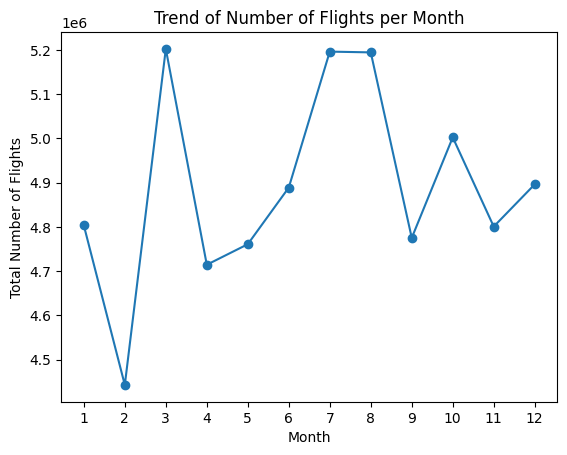

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

flights_per_month = df.groupby('month')['arr_flights'].sum()

flights_per_month.plot(kind='line', marker='o')
plt.title('Trend of Number of Flights per Month')
plt.xlabel('Month')
plt.ylabel('Total Number of Flights')
plt.xticks(range(1, 13))
plt.show()

2) Number of Flights by Airline

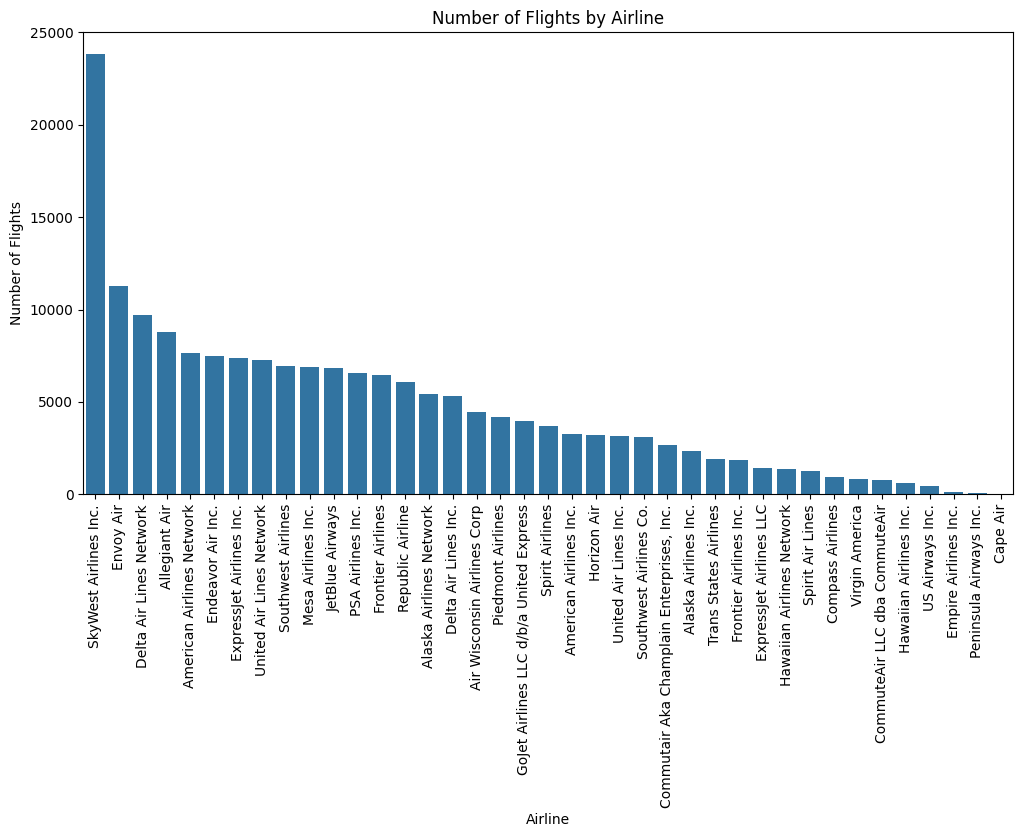

In [8]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='carrier_name', order=df['carrier_name'].value_counts().index)
plt.title('Number of Flights by Airline')
plt.xlabel('Airline')
plt.ylabel('Number of Flights')
plt.xticks(rotation=90)
plt.show()


3) Top 10 Airports by Number of Flights

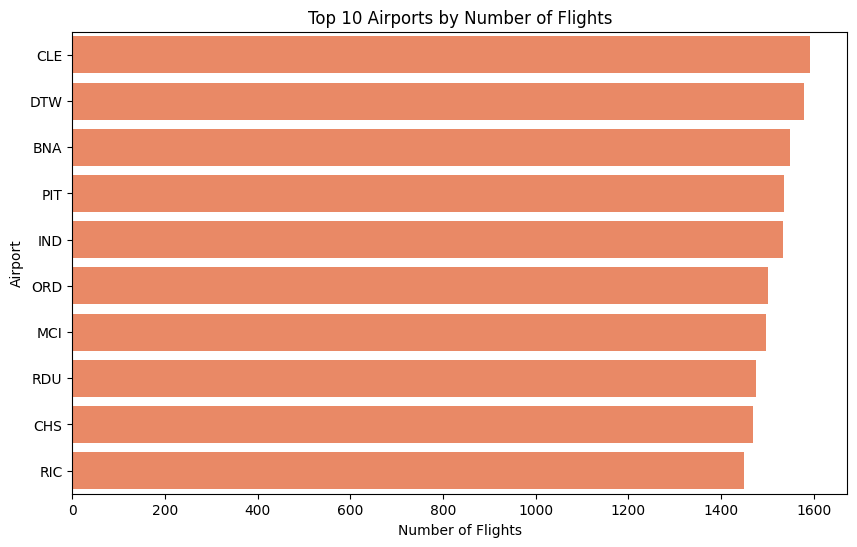

In [43]:
top_10_airports = df['airport'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_10_airports.values, y=top_10_airports.index, color='#ff7f50')
plt.title('Top 10 Airports by Number of Flights')
plt.xlabel('Number of Flights')
plt.ylabel('Airport')
plt.show()


4) Average delay components by Carrier

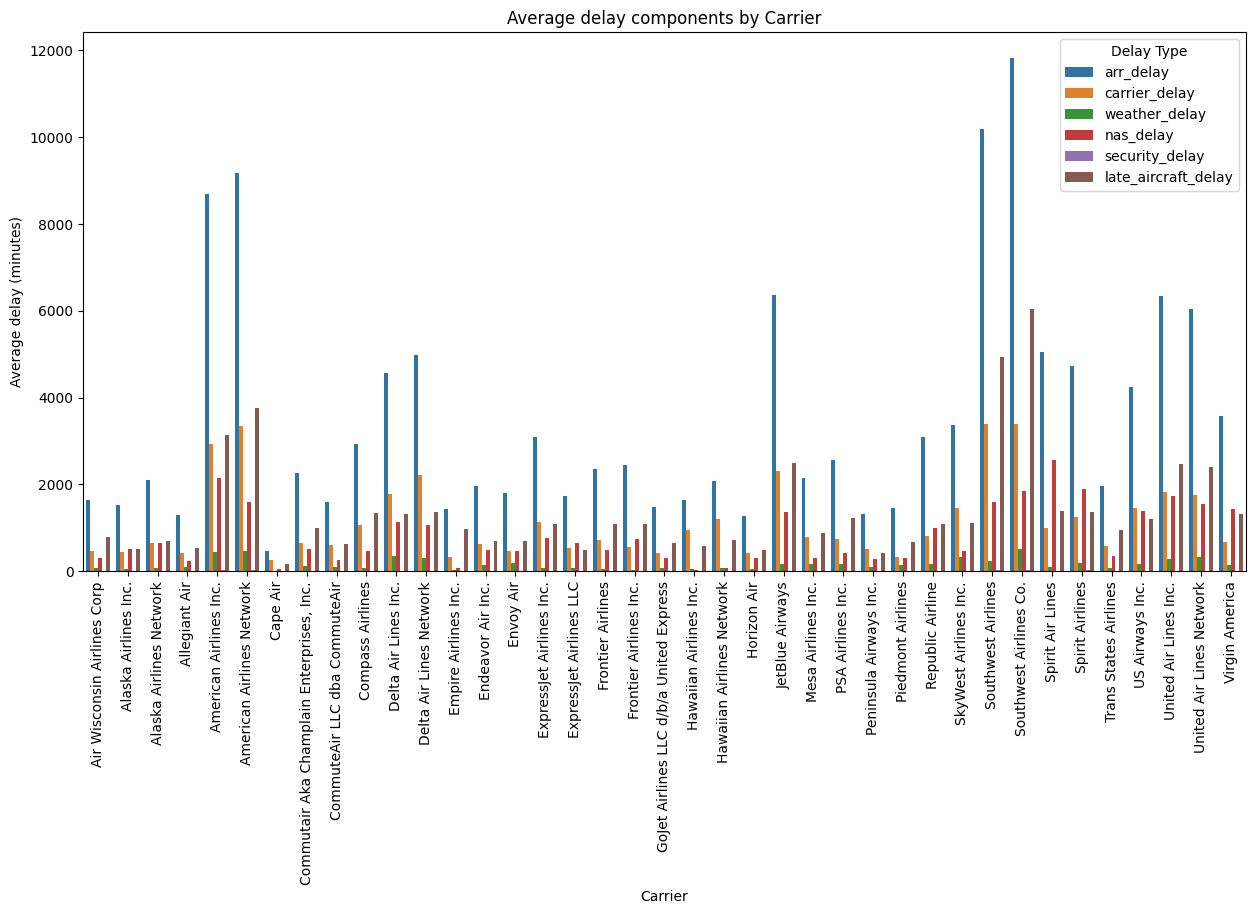

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

delay_cols = ['arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']

avg_delay = df.groupby('carrier_name')[delay_cols].mean()

avg_delay = avg_delay.reset_index()
avg_delay = avg_delay.melt(id_vars='carrier_name', var_name='delay_type', value_name='average_delay')

plt.figure(figsize=(15, 7))
sns.barplot(data=avg_delay, x='carrier_name', y='average_delay', hue='delay_type')
plt.title('Average delay components by Carrier')
plt.xlabel('Carrier')
plt.ylabel('Average delay (minutes)')
plt.xticks(rotation=90)
plt.legend(title='Delay Type')
plt.show()


5) Cancellations and Diverted Flights per Airline

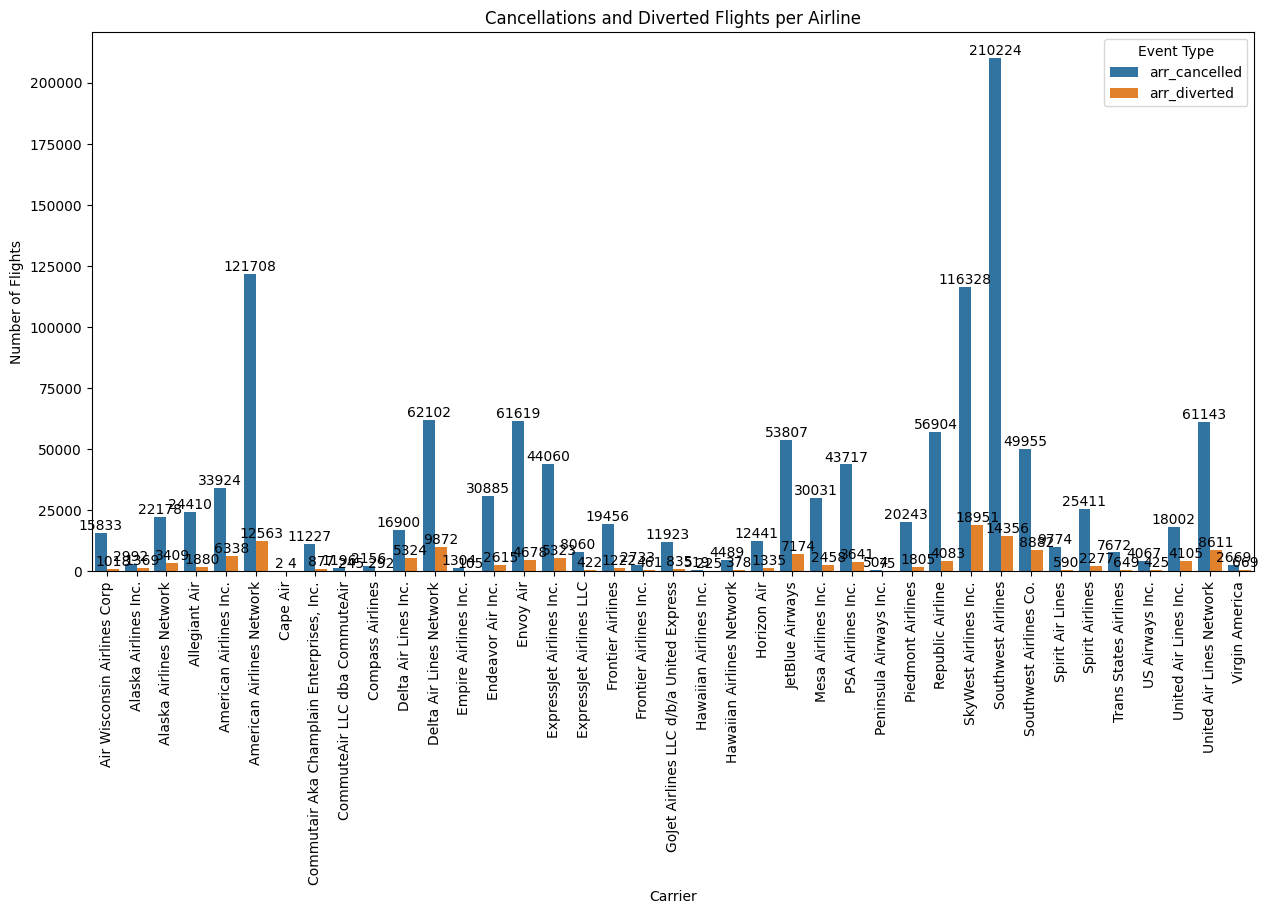

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

cancel_divert = df.groupby('carrier_name')[['arr_cancelled', 'arr_diverted']].sum()
cancel_divert = cancel_divert.reset_index()
cancel_divert = cancel_divert.melt(id_vars='carrier_name', var_name='type', value_name='flights')

plt.figure(figsize=(15, 7))
sns.barplot(data=cancel_divert, x='carrier_name', y='flights', hue='type')
plt.title('Cancellations and Diverted Flights per Airline')
plt.xlabel('Carrier')
plt.ylabel('Number of Flights')
plt.xticks(rotation=90)
plt.legend(title='Event Type')

# Optional: Annotate values on tops of bars
for p in plt.gca().patches:
    height = p.get_height()
    if height > 0:
        plt.text(p.get_x() + p.get_width() / 2., height + 5, int(height),
                 ha='center', va='bottom')

plt.show()


6) Average Arrival Delay per Month

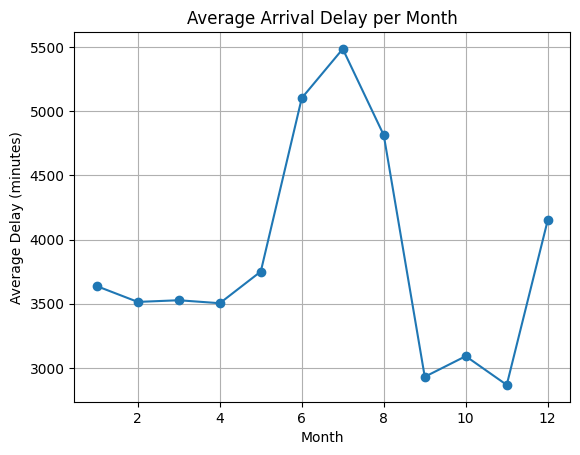

In [49]:
monthly_avg_delay = df.groupby('month')['arr_delay'].mean()
plt.plot(monthly_avg_delay.index,monthly_avg_delay.values,marker='o')

plt.title('Average Arrival Delay per Month')
plt.xlabel('Month')
plt.ylabel('Average Delay (minutes)')
plt.grid(True)
plt.show()

7) Top N Airlines – Total vs Delayed (Side-by-side)

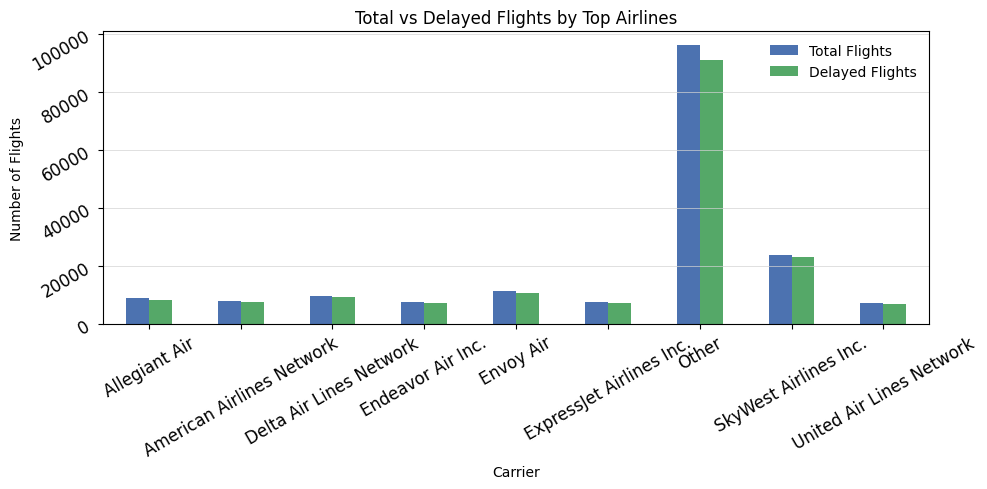

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

N = 8
airline_counts = df['carrier_name'].value_counts()
top_airlines = list(airline_counts.index[:N])

df['airline_grouped'] = df['carrier_name'].where(
    df['carrier_name'].isin(top_airlines), 'Other'
)

total_counts = df['airline_grouped'].value_counts().sort_index()
delayed_counts = df.loc[df['arr_delay'] > 0, 'airline_grouped'].value_counts().reindex(total_counts.index, fill_value=0)

plot_df = pd.DataFrame({"Total Flights": total_counts, "Delayed Flights": delayed_counts})

ax = plot_df.plot(kind='bar', figsize=(10, 5), color=['#4C72B0', '#55A868'])
ax.set_title('Total vs Delayed Flights by Top Airlines')
ax.set_xlabel('Carrier')
ax.set_ylabel('Number of Flights')
ax.legend(frameon=False)
ax.tick_params(rotation=30, labelsize=12)
ax.grid(axis='y', color='#D3D3D3', linestyle='-', linewidth=0.5)

plt.tight_layout()
plt.show()


8) Top N Airlines – Stacked View (Proportion)

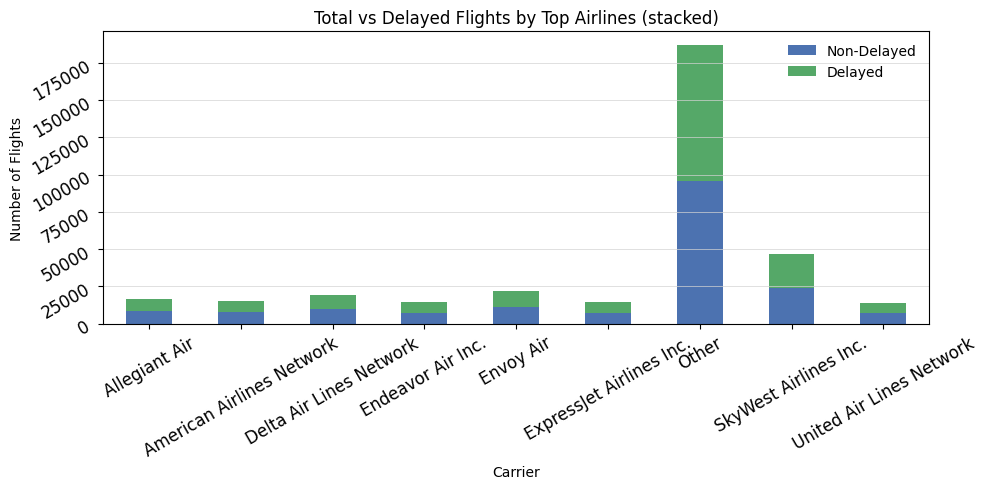

In [51]:
ax = plot_df.plot(kind='bar', stacked=True, figsize=(10, 5), color=['#4C72B0', '#55A868'])
ax.set_title('Total vs Delayed Flights by Top Airlines (stacked)')
ax.set_xlabel('Carrier')
ax.set_ylabel('Number of Flights')
ax.legend(['Non-Delayed', 'Delayed'], frameon=False)
ax.tick_params(rotation=30, labelsize=12)
ax.grid(axis='y', color='#D3D3D3', linestyle='-', linewidth=0.5)

plt.tight_layout()
plt.show()


9) Distribution — Boxplot of Arrival Delays for Top 10

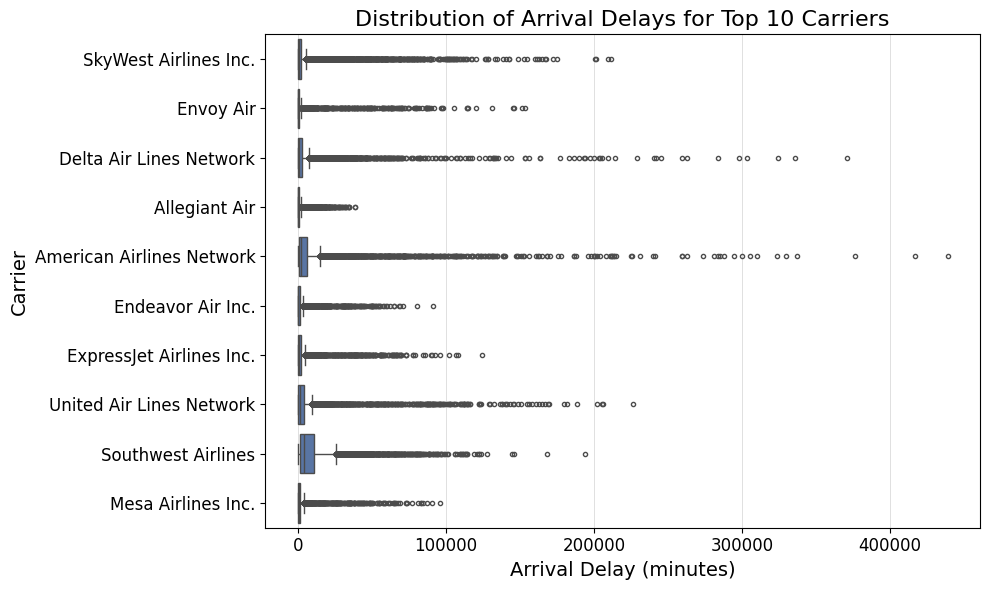

In [52]:
top10 = df['carrier_name'].value_counts().index[:10]
df_top10 = df[df['carrier_name'].isin(top10)]

plt.figure(figsize=(10,6))
sns.boxplot(
    data=df_top10,
    x='arr_delay',
    y='carrier_name',
    order=top10,
    fliersize=3,
    linewidth=1,
    color='#4C72B0'
)
plt.xlabel("Arrival Delay (minutes)", fontsize=14)
plt.ylabel("Carrier", fontsize=14)
plt.title("Distribution of Arrival Delays for Top 10 Carriers", fontsize=16)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.grid(axis='x', color='#D3D3D3', linestyle='-', linewidth=0.5)

plt.tight_layout()
plt.show()


1) Flight delays peak during the months around the winter solstice.
       2) December has the highest number of delays, likely due to holiday travel.
3) Adverse winter weather and heavy passenger flow contribute to these disruptions.

10) Calculating Operational Adjustability Index (OAI)

In [69]:
# This code calculates the Operational Adjustability Index (OAI) by applying weighted sums to different delay types,
# prioritizing controllable delays (carrier and late aircraft) with higher multipliers (1.5×) and less controllable delays (NAS) with a moderate multiplier (1.2×), while treating security and weather delays as base values (1×).
df['OAI'] = 1.5*(df['carrier_delay'] + df['late_aircraft_delay']) + \
            1.2*df['nas_delay'] + \
            1*(df['security_delay'] + df['weather_delay'])

print("Average OAI delay :", df['OAI'].mean())

Average OAI delay : 6.6146179365517e-17


**Correlation**

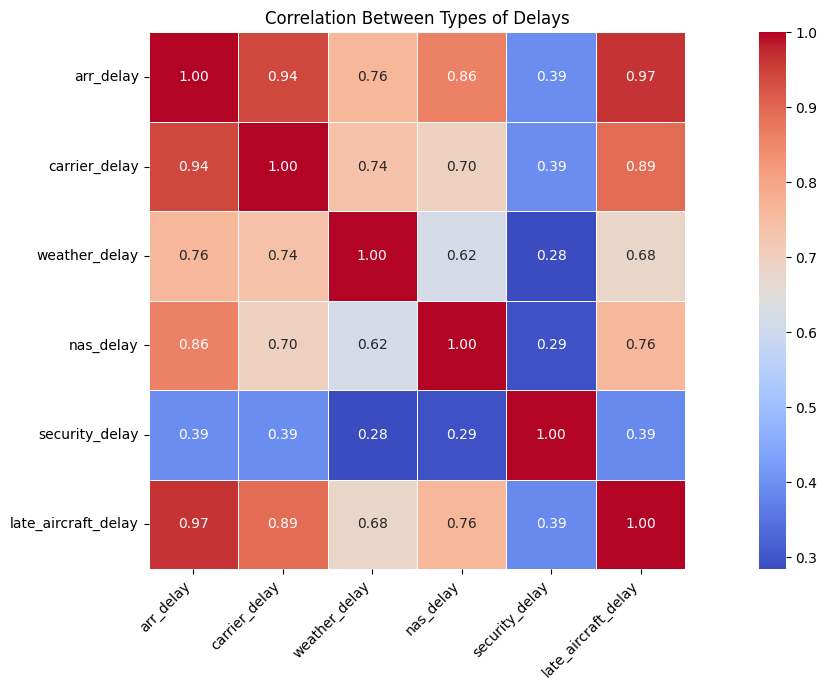

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

delay_corr = df[delay_cols].corr()

plt.figure(figsize=(15, 7))
sns.heatmap(delay_corr, cmap='coolwarm', annot=True, fmt='.2f',
            square=True, linewidths=0.5, annot_kws={"size": 10})

plt.title('Correlation Between Types of Delays')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()


In [53]:

df.isnull().sum()

,0
year,0
month,0
carrier,0
carrier_name,0
airport,0
airport_name,0
arr_flights,341
arr_del15,591
carrier_ct,341
weather_ct,341


## **Feature Engineering**




1) Handling missing values

In [54]:
# As the missing values for all the columns are below 5%, we can drop the missing values.
df.dropna(inplace=True)

2) Feature Standardization

In [55]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_cols = ['arr_flights', 'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


In [56]:
# Adding new column (total delay)
df['total_delay'] = df[['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']].sum(axis=1)

# **Modeling**
- **Baseline Models:** Linear Regression, Logistic Regression
- **Advanced Models:** Random Forest, XGBoost, LightGBM
- Both classification (delayed/not) and regression (delay duration) tasks.


# **Classification**

Defining Features

In [72]:
features = ['arr_flights', 'carrier_ct', 'weather_ct', 'nas_ct',
    'security_ct', 'late_aircraft_ct', 'arr_cancelled',
    'arr_diverted', 'total_delay']

X = df[features]
y = df['is_delayed']

Creating Target Variables for ('is delayed') for classification



In [73]:
df["delay_rate"] = df["arr_del15"] / df["arr_flights"]

# Label a group as 'delayed' if more than 20% of its flights were delayed ≥ 15 minutes
df["is_delayed"] = (df["delay_rate"] > 0.2).astype(int)

# Check value counts
print(df["is_delayed"].value_counts())

is_delayed
0    146876
1     31871
Name: count, dtype: int64


In [76]:
features = ['arr_flights', 'carrier_ct', 'weather_ct', 'nas_ct',
    'security_ct', 'late_aircraft_ct', 'arr_cancelled',
    'arr_diverted', 'total_delay']

X = df[features]
y = df['is_delayed']

Split into training and testing set

In [79]:
from sklearn.model_selection import train_test_split

# Here, 'y' is your target variable
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set size :", X_train.shape)
print("Test set size :", X_test.shape)

Training set size : (142997, 9)
Test set size : (35750, 9)


 Handle class imbalance (SMOTE)

In [80]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Before SMOTE :", y_train.value_counts())
print("After SMOTE :", y_train_smote.value_counts())

Before SMOTE : is_delayed
0    117383
1     25614
Name: count, dtype: int64
After SMOTE : is_delayed
0    117383
1    117383
Name: count, dtype: int64


**1) Logistic Regression with SMOTE-adjusted data**

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score,fbeta_score, roc_curve, confusion_matrix

log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train_smote, y_train_smote)

y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]

print("Logistic Regression Evaluation:")
print(f" Accuracy : {accuracy_score(y_test, y_pred):.4f}")
print(f" F1 Score : {f1_score(y_test, y_pred):.4f}")
print(f" AUC Score : {roc_auc_score(y_test, y_pred_proba):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Logistic Regression Evaluation:
 Accuracy : 0.9953
 F1 Score : 0.9868
 AUC Score : 1.0000
Confusion Matrix:
[[29326   167]
 [    1  6256]]


**2) XGBoost with SMOTE-adjusted**

In [83]:
from xgboost import XGBClassifier


xgb = XGBClassifier()
xgb.fit(X_train_smote, y_train_smote)

y_pred_xgb = xgb.predict(X_test)
y_pred_proba_xgb = xgb.predict_proba(X_test)[:, 1]

print("XGBoost Evaluation:")
print(f" Accuracy : {accuracy_score(y_test, y_pred_xgb):.4f}")
print(f" F1 Score : {f1_score(y_test, y_pred_xgb):.4f}")
print(f" AUC Score : {roc_auc_score(y_test, y_pred_proba_xgb):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))


XGBoost Evaluation:
 Accuracy : 0.9978
 F1 Score : 0.9938
 AUC Score : 1.0000
Confusion Matrix:
[[29450    43]
 [   35  6222]]


SHAP Analysis to interpret XGBoost

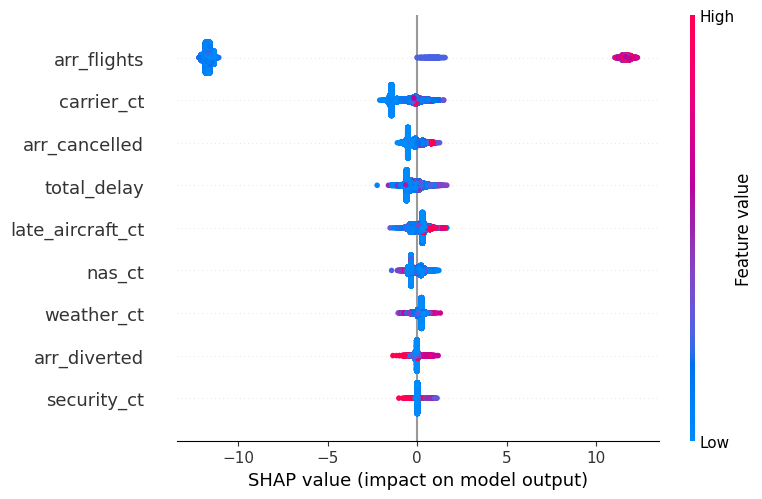

In [84]:
import shap

explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_test)

# Summary Plot
shap.summary_plot(shap_values, X_test)

# **Regressor**

Defining Features and Target

In [57]:
features = ['arr_flights', 'carrier_ct', 'weather_ct', 'nas_ct',
    'security_ct', 'late_aircraft_ct', 'arr_cancelled',
    'arr_diverted', 'total_delay']

X = df[features]
y = df['arr_delay']

Split into training and testing set

In [65]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("Training set size :", X_train.shape)
print("Test set size :", X_test.shape)

Training set size : (142997, 9)
Test set size : (35750, 9)


**1) Linear Regression**

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    fbeta_score
)

# Fit Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predictions
y_pred = lr.predict(X_test)

# Regression metrics
mae  = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)
r2   = r2_score(y_test, y_pred)


In [60]:
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.3f}")

y_test_cls = (y_test > 15).astype(int)
y_pred_cls = (y_pred > 15).astype(int)

# Compute F₂ (beta=2)
f2 = fbeta_score(y_test_cls, y_pred_cls, beta=2)
print(f"F₂ Score (β=2): {f2:.3f}")


Mean Absolute Error (MAE): 0.04
Root Mean Squared Error (RMSE): 0.02
R² Score: 0.983
F₂ Score (β=2): 0.944


Scatter Plot

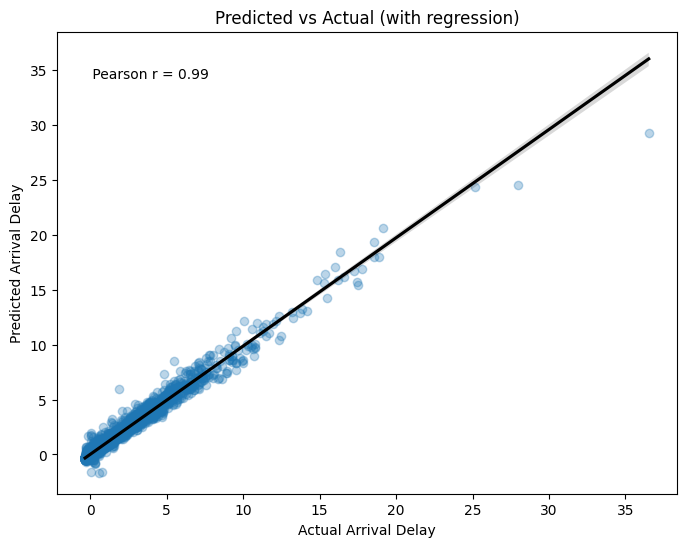

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8,6))
sns.regplot(x=y_test, y=y_pred, scatter_kws={"alpha": 0.3}, line_kws={"color": "black"})

plt.xlabel('Actual Arrival Delay')
plt.ylabel('Predicted Arrival Delay')
plt.title('Predicted vs Actual (with regression)')
r = np.corrcoef(y_test, y_pred)[0, 1]
plt.text(0.05, 0.9, f" Pearson r = {r:.2f}", transform=plt.gca().transAxes)

plt.show()



**2) Random Forest Regressor**

In [23]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest MAE:", mean_absolute_error(y_test, y_pred_rf))
print("Random Forest RMSE:", mean_squared_error(y_test, y_pred_rf))
print("Random Forest R2 Score:", r2_score(y_test, y_pred_rf))
print("Random Forest F2 Score:", fbeta_score((y_test > 15).astype(int), (y_pred_rf > 15).astype(int), beta=2))


Random Forest MAE: 0.024545333318120807
Random Forest RMSE: 0.009982279536436364
Random Forest R2 Score: 0.9892972068293057
Random Forest F2 Score: 0.9340659340659341


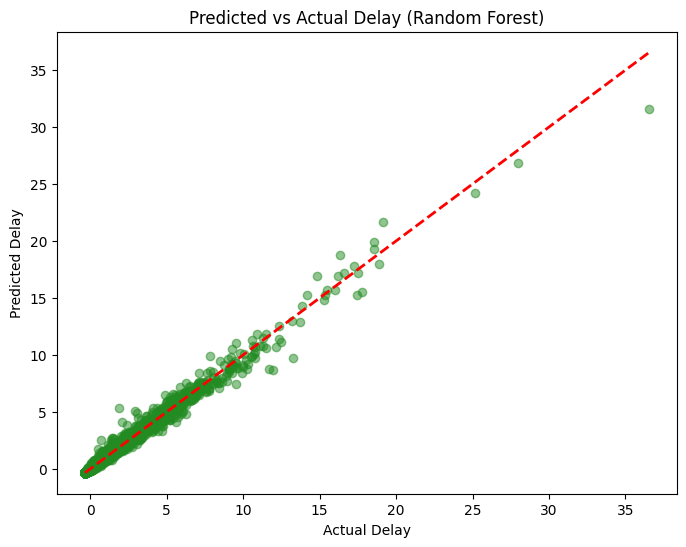

In [24]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_rf, color='forestgreen', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Actual Delay')
plt.ylabel('Predicted Delay')
plt.title('Predicted vs Actual Delay (Random Forest)')
plt.show()

**3) XGBoost Rergressor**

In [25]:
%pip install xgboost
import xgboost as xgb

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

xgb_reg = xgb.XGBRegressor(n_estimators=100, random_state=42)
xgb_reg.fit(X_train, y_train)


y_pred_xgb = xgb_reg.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
f2_xgb = fbeta_score((y_test > 15).astype(int), (y_pred_xgb > 15).astype(int), beta=2)

print(f"XGBoost Regressor MAE: {mae_xgb:.2f}")
print(f"XGBoost Regressor RMSE: {rmse_xgb:.2f}")
print(f"XGBoost Regressor R2 Score: {r2_xgb:.3f}")
print(f"XGBoost Regressor F2 Score: {f2_xgb:.3f}")

XGBoost Regressor MAE: 0.03
XGBoost Regressor RMSE: 0.03
XGBoost Regressor R2 Score: 0.967
XGBoost Regressor F2 Score: 0.632


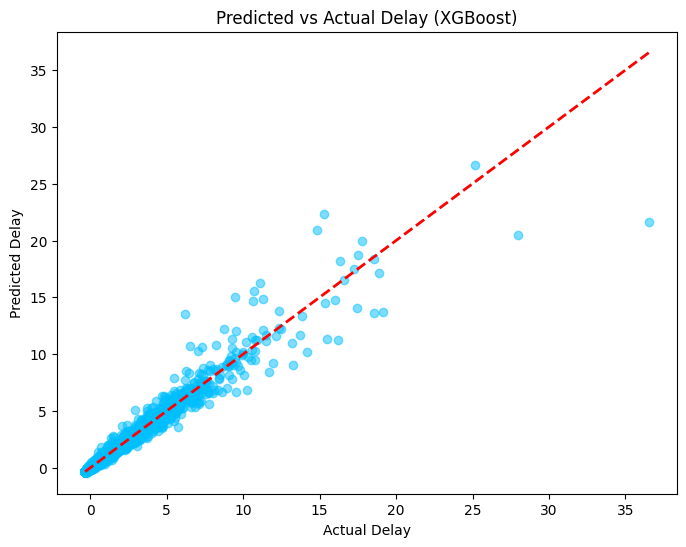

In [26]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_xgb, color='deepskyblue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel("Actual Delay")
plt.ylabel("Predicted Delay")
plt.title("Predicted vs Actual Delay (XGBoost)")
plt.show()


# **Model Evaluation and Comparison**

- Report MAE, RMSE, R2 for regression models; Accuracy, Precision, Recall, F1, ROC-AUC for classification.
- Visualize results with bar plots and tables.
- Residual analysis: Plot residuals for best models.


In [36]:
# Jinja2 is a fast, expressive templating engine for Python that lets you generate dynamic text (often HTML) by combining templates with your data using familiar control structures (loops, conditionals) and filters.

%pip install jinja2


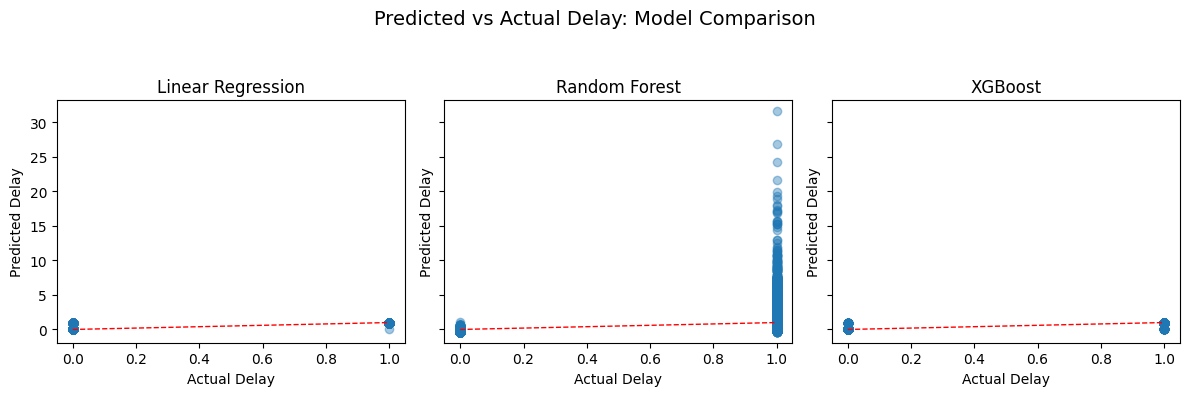

In [85]:
import math

models = [
    ("Linear Regression",    y_pred),
    ("Random Forest",         y_pred_rf),
    ("XGBoost",               y_pred_xgb),
]

n_models = len(models)
n_cols   = 3
n_rows   = math.ceil(n_models / n_cols)

fig, axes = plt.subplots(n_rows, n_cols,
                         figsize=(n_cols*4, n_rows*4),
                         sharex=True, sharey=True)

axes_flat = axes.flatten()

mn, mx = y_test.min(), y_test.max()
for ax, (name, y_pred) in zip(axes_flat, models):
    ax.scatter( y_test, y_pred, alpha=0.4 )
    ax.plot( [mn,mx], [mn,mx], 'r--', linewidth=1 )
    ax.set_title(name, fontsize=12)
    ax.set_xlabel("Actual Delay")
    ax.set_ylabel("Predicted Delay")

for ax in axes_flat[n_models:]:
    ax.axis('off')

fig.suptitle("Predicted vs Actual Delay: Model Comparison", fontsize=14)
fig.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


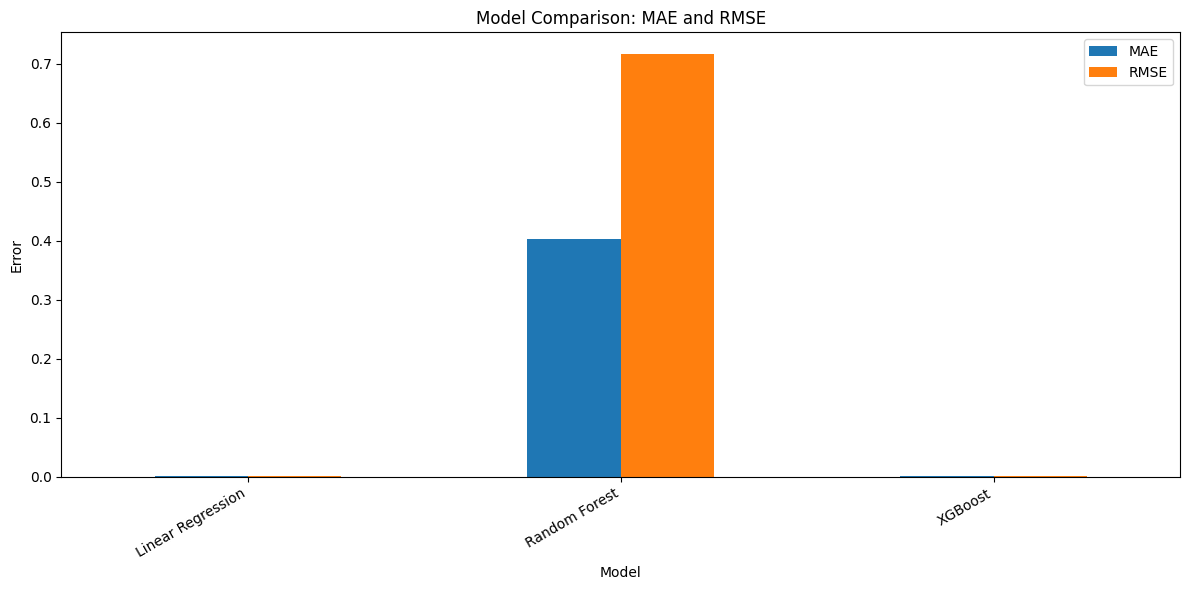

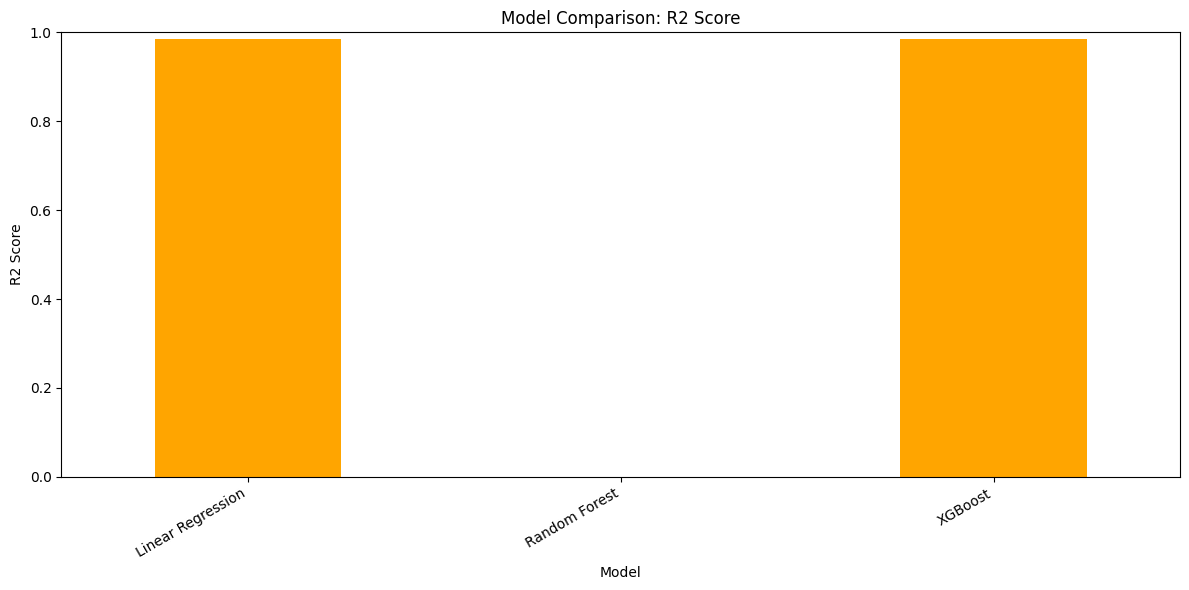

,Model,MAE,RMSE,R2,F2
0,Linear Regression,0.002,0.002,0.985,0.000000
1,Random Forest,0.404,0.718,-3.971,0.000000
2,XGBoost,0.002,0.002,0.985,0.000000


In [86]:
models = [
    ("Linear Regression", y_pred),
    ("Random Forest", y_pred_rf),
    ("XGBoost", y_pred_xgb),
]

results = []
for name, y_pred in models:
    results.append({
        "Model": name,
        "MAE": mean_absolute_error(y_test, y_pred),
        "RMSE": mean_squared_error(y_test, y_pred),
        "R2": r2_score(y_test, y_pred),
        "F2": fbeta_score((y_test > 15).astype(int), (y_pred > 15).astype(int), beta=2)
    })

df_results = pd.DataFrame(results)

df_results.set_index("Model")[["MAE", "RMSE"]].plot(kind="bar", figsize=(12,6))
plt.title("Model Comparison: MAE and RMSE")
plt.ylabel("Error")
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

df_results.set_index("Model")["R2"].plot(kind="bar", figsize=(12,6), color="orange")
plt.title("Model Comparison: R2 Score")
plt.ylabel("R2 Score")
plt.xticks(rotation=30, ha='right')
plt.ylim(0,1)
plt.tight_layout()
plt.show()

from IPython.display import display
display(df_results.style.format({"MAE": "{:.3f}", "RMSE": "{:.3f}", "R2": "{:.3f}"}))
